In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading the dataset

In [2]:
df = pd.read_csv("all_data.csv")

In [3]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


# 2. Analysing the variables

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [5]:
df["Year"].nunique()

16

In [6]:
df["Year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

In [7]:
df["Year"].value_counts()

2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: Year, dtype: int64

In [8]:
df.Country.value_counts()

Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64

# 3. Cleaning the Dataset

### - Changing the name of a column

In [9]:
df.rename(columns={"Life expectancy at birth (years)":"Life_expectancy"}, inplace=True)

In [10]:
df.columns

Index(['Country', 'Year', 'Life_expectancy', 'GDP'], dtype='object')

### - Converting the years (integer) into date format

In [12]:
df.Year = df.Year.astype('int32')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int32  
 2   Life_expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
dtypes: float64(2), int32(1), object(1)
memory usage: 2.8+ KB


In [15]:
df["Year"] = pd.to_datetime(df.Year, format = '%Y')


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Country          96 non-null     object        
 1   Year             96 non-null     datetime64[ns]
 2   Life_expectancy  96 non-null     float64       
 3   GDP              96 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 3.1+ KB


In [17]:
df.Year

0    2000-01-01
1    2001-01-01
2    2002-01-01
3    2003-01-01
4    2004-01-01
        ...    
91   2011-01-01
92   2012-01-01
93   2013-01-01
94   2014-01-01
95   2015-01-01
Name: Year, Length: 96, dtype: datetime64[ns]

In [18]:
df['Year'] = df['Year'].dt.year

In [19]:
df["Year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

# 4. Visualizations

### - Univariate analysis

<Figure size 720x576 with 0 Axes>

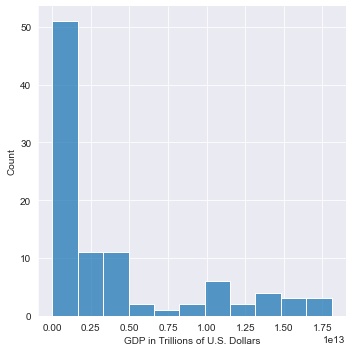

In [45]:
# GDP
plt.figure(figsize=(10,8))
sns.displot(df.GDP)
plt.xlabel("GDP in Trillions of U.S. Dollars");

<Figure size 720x576 with 0 Axes>

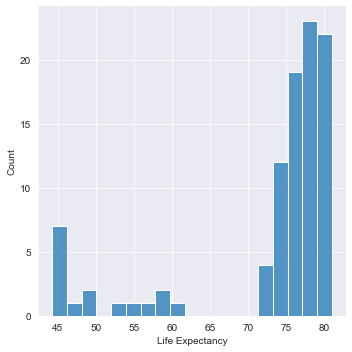

In [46]:
# Life Expectancy
plt.figure(figsize=(10,8))
sns.displot(df.Life_expectancy)
plt.xlabel("Life Expectancy");

### - Bivariate analysis

In [47]:
df1 = df.drop("Year", axis=1) #I am going to look into the GDP and the life expectancy of every country

In [48]:
dfmean = df1.groupby(["Country"]).mean().reset_index()

In [49]:
dfmean

,Country,Life_expectancy,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


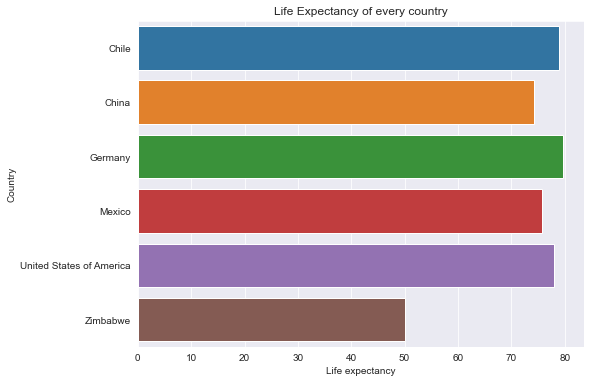

In [92]:
plt.figure(figsize=(8,6))
sns.barplot(x="Life_expectancy", y="Country", data=dfmean)
plt.title("Life Expectancy of every country")
plt.xlabel("Life expectancy")
plt.show()

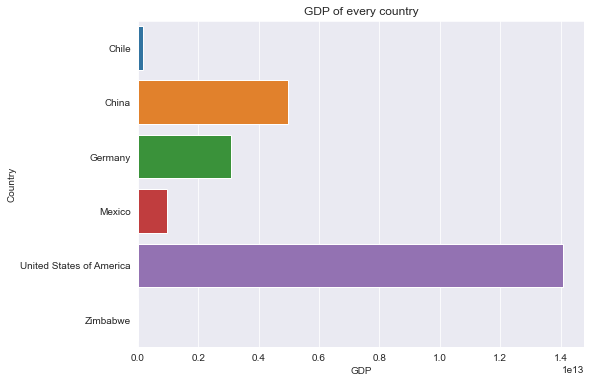

In [93]:
plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="Country", data=dfmean)
plt.title("GDP of every country")
plt.xlabel("GDP")
plt.show()

In [55]:
years = df.groupby(["Year"])["Life_expectancy", "GDP"].mean().reset_index() # Now, I am going to look into the
#average GDP and life expectancy through the years

/var/folders/4f/22_7l8652y981sfvkff6ls9w0000gn/T/ipykernel_41232/3450148240.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  years = df.groupby(["Year"])["Life_expectancy", "GDP"].mean().reset_index() # Now, I am going to look into the


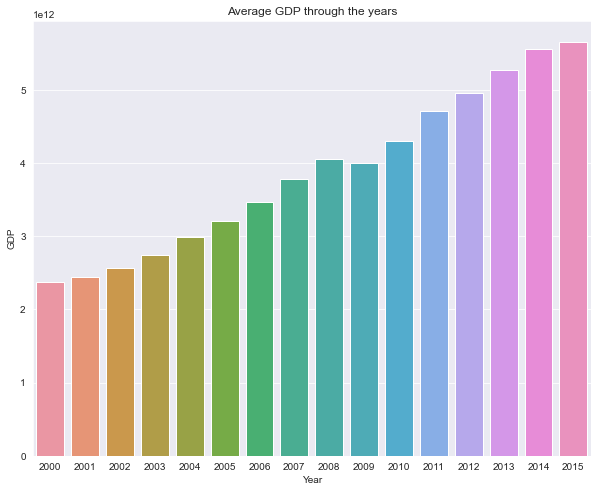

In [60]:
plt.figure(figsize=(10, 8))
sns.barplot(x="Year", y="GDP", data=years)
plt.title("Average GDP through the years")
plt.show()

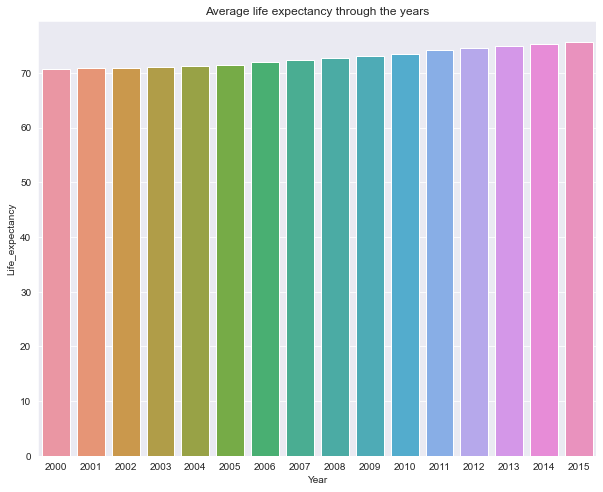

In [61]:
plt.figure(figsize=(10, 8))
sns.barplot(x="Year", y="Life_expectancy", data=years)
plt.title("Average life expectancy through the years")
plt.show()

In [ ]:
# I am going to analyse the GDP and the life expectancy of every country through the years

In [62]:
df["Country"].unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [63]:
Chile = df[df["Country"]=="Chile"]

In [64]:
Chile

,Country,Year,Life_expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


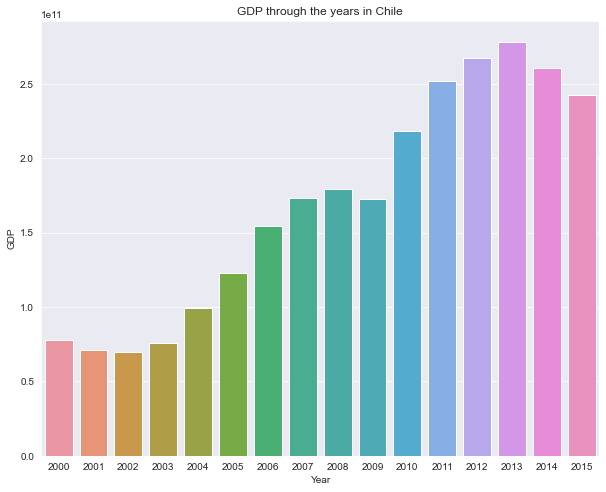

In [68]:
plt.figure(figsize=(10, 8))
sns.barplot(x="Year", y="GDP", data=Chile)
plt.title("GDP through the years in Chile")
plt.show()

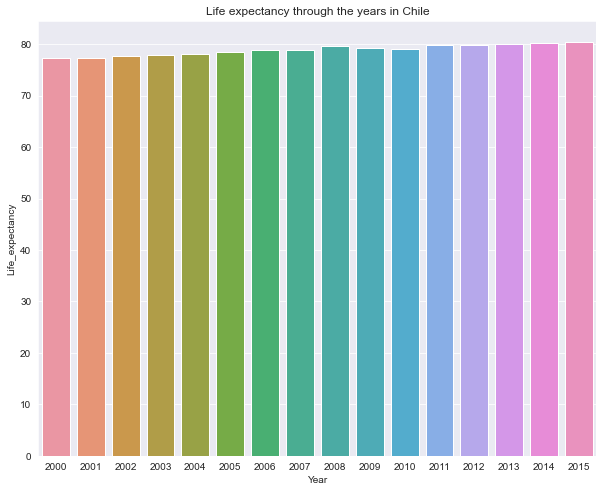

In [69]:
plt.figure(figsize=(10, 8))
sns.barplot(x="Year", y="Life_expectancy", data=Chile)
plt.title("Life expectancy through the years in Chile")
plt.show()

In [70]:
China = df[df["Country"]=="China"]

In [72]:
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [73]:
Germany = df[df["Country"]=="Germany"]

In [74]:
Mexico = df[df["Country"]=="Mexico"]

In [75]:
US = df[df["Country"]=="United States of America"]

In [76]:
Zimbabwe = df[df["Country"]=="Zimbabwe"]

In [81]:
def visualize_GDP(dataset):
    plt.figure(figsize=(10, 8))
    sns.barplot(x="Year", y="GDP", data=dataset)
    plt.show()

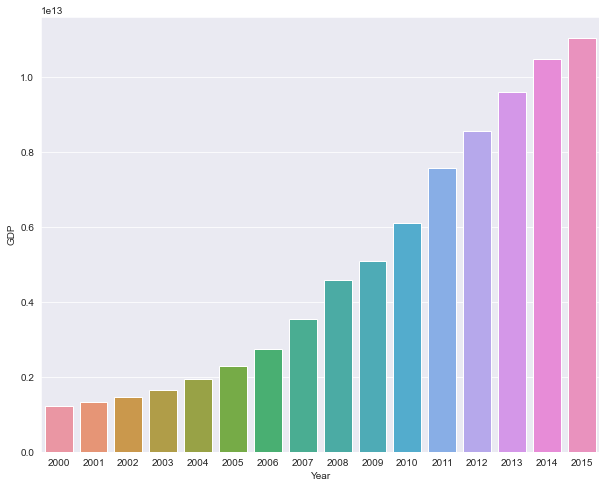

In [82]:
visualize_GDP(China)

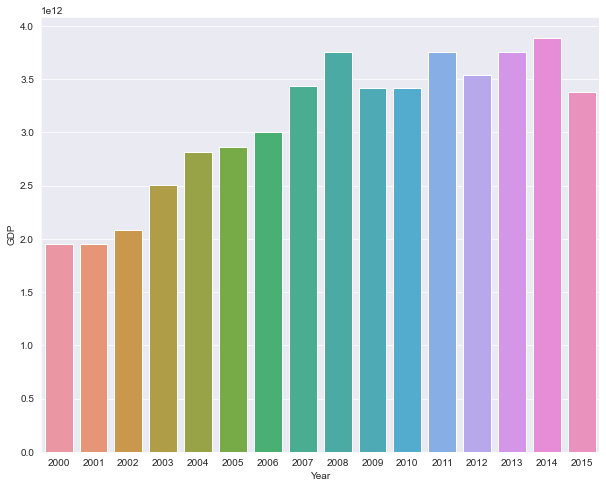

In [83]:
visualize_GDP(Germany)

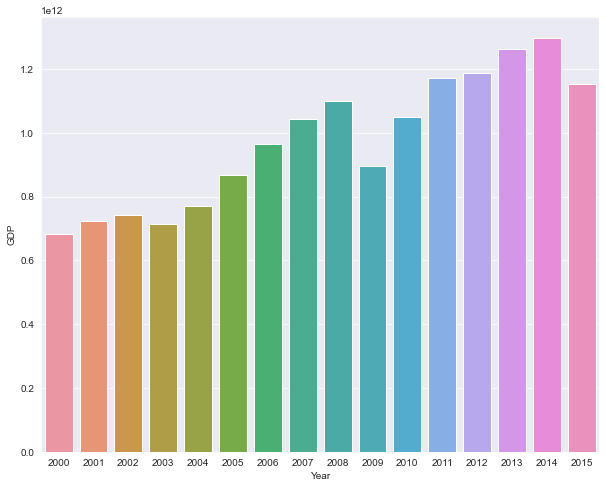

In [84]:
visualize_GDP(Mexico)

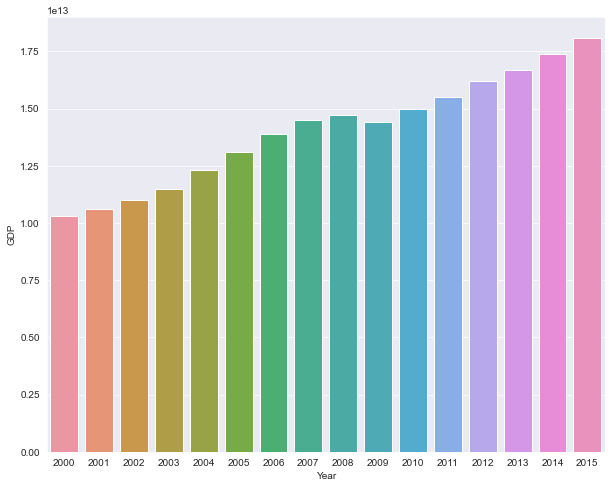

In [85]:
visualize_GDP(US)

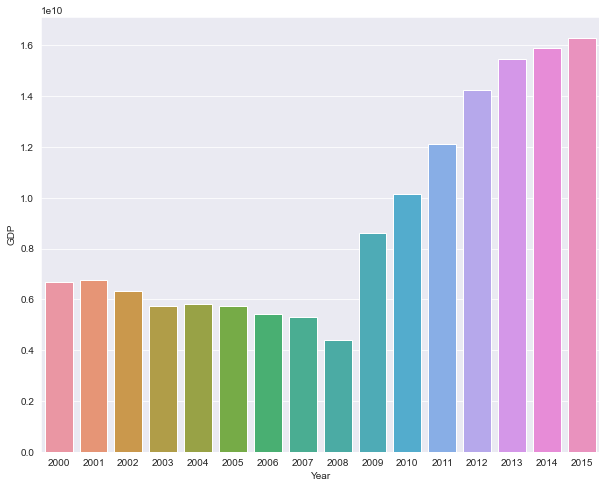

In [86]:
visualize_GDP(Zimbabwe)

In [79]:
def visualize_life_expectancy(dataset):
    plt.figure(figsize=(10, 8))
    sns.barplot(x="Year", y="Life_expectancy", data=dataset)
    plt.show()

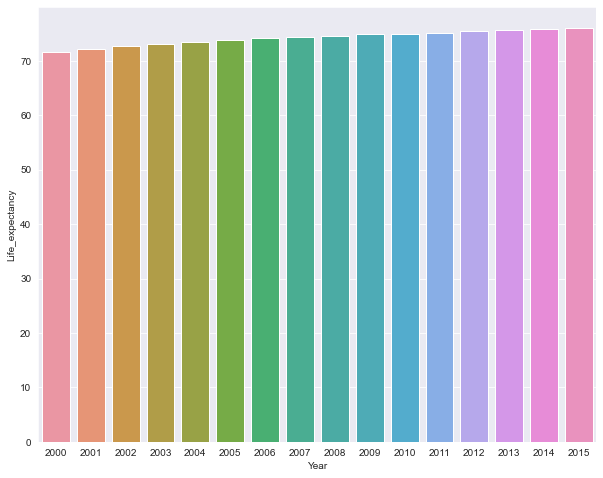

In [87]:
visualize_life_expectancy(China)

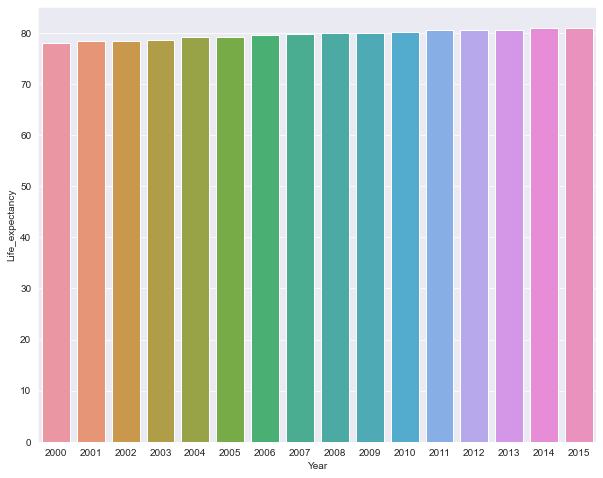

In [80]:
visualize_life_expectancy(Germany)

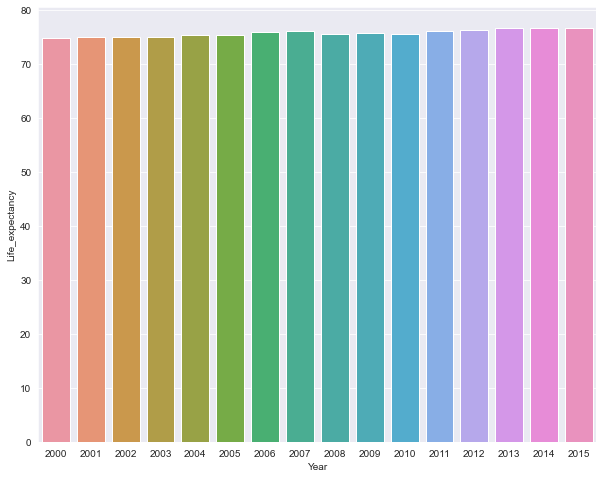

In [89]:
visualize_life_expectancy(Mexico)

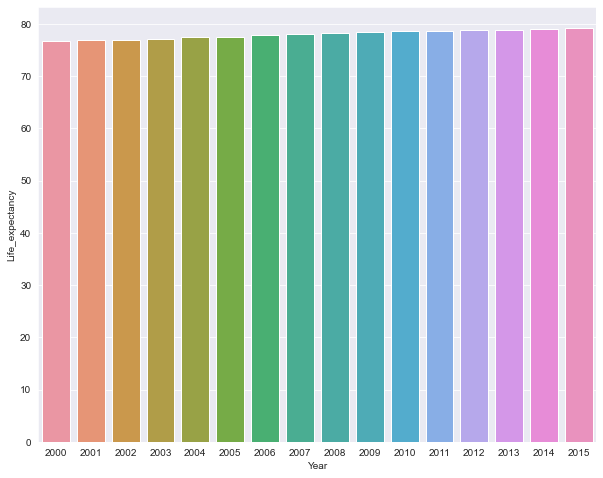

In [90]:
visualize_life_expectancy(US)

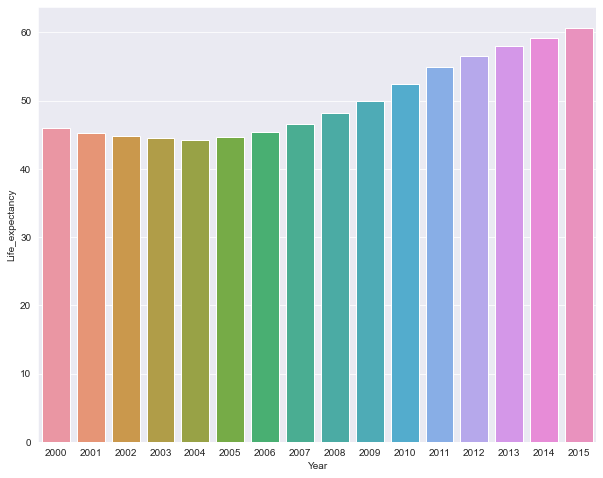

In [91]:
visualize_life_expectancy(Zimbabwe)

In [94]:
Zimbabwe.Life_expectancy.min()

44.3

In [95]:
Zimbabwe.Life_expectancy.max()

60.7

### - Multivariate analysis

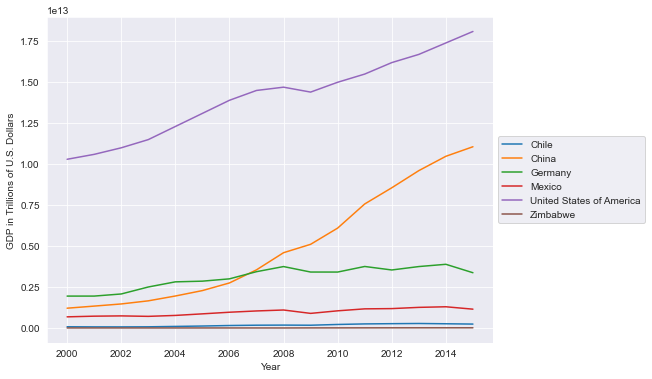

In [96]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars");

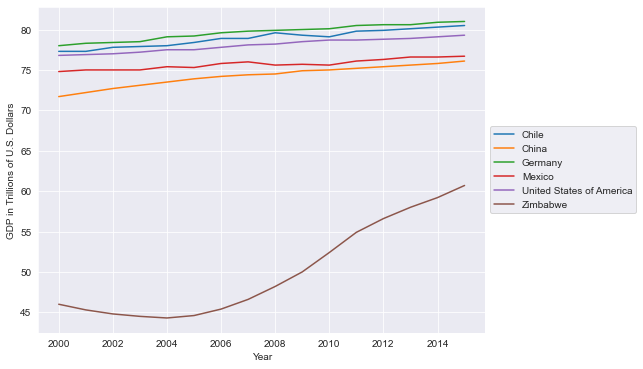

In [97]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.Life_expectancy, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars");

# 5. Conclusions

- US is the country with the highest GDP, followed by China.
- Zimbabwe, Chile and Mexico have a very low GDP.
- When it comes to life expectancy, most of the countries have a similar one (Germany is at the top, followed by Chile and the US), with the exception of Zimbabwe.
- In most of the countries, the GDP has increased through the years, whereas the life expectancy has barely changed, with the exception of Zimbabwe (from 44 to 60).
